In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pwd

/content


### Import

In [3]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
import tensorflow
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from PIL import Image
import glob

from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model


### Verify Image

In [ ]:
image_list = []
for filename in glob.glob('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/*.jpg'): 
    im = Image.open(filename)
    image_list.append(im)
    
print(image_list)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F5042890FD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F5042890C90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288DED0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D310>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D050>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D950>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D290>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D8D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288DE90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D150>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288DC90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F504288D1D0>, <PIL.JpegImagePlugin.JpegIm

In [ ]:
image_list_0 = np.array(image_list[0])
image_list_0.shape

(32, 32, 3)

### Load Dataset 1

In [4]:
from pathlib import Path
import cv2
from google.colab.patches import cv2_imshow
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

datapath = Path('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32')
data_dir = sorted([x for x in datapath.iterdir()], key=lambda x: int(x.stem))
print(data_dir)

data = []
label = []

for dir_path in data_dir :
  for i , filename in enumerate(os.listdir(dir_path)):
    img = cv2.imread(os.path.join(dir_path,filename))
    img = cv2.resize(img, (32, 32))
    data.append(img)
    label.append([int(dir_path.stem)-2])

data2 = np.array(data)
data = np.array(data).astype(np.float32()) / 255.0
label = np.array(label).reshape(-1,1)

print("train",data.shape)
print("train_label",label.shape)
print("train",label.dtype)
train_X, test_X, train_y, test_y = train_test_split(data, label, train_size= 0.8)

[PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/2'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/3'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/4'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/5'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/6'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/7'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/8'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/9'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/10'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/11'), PosixPath('/content/gdrive/MyDrive/中興大學/花青素多色樣品

In [5]:
test_X.shape

(817, 32, 32, 3)

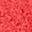

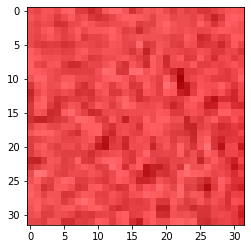

In [6]:
data2.shape
# print(data2[0])
# np.min(data2[0])
# plt.imshow(data2[0])
cv2_imshow(data2[0])
plt.imshow(cv2.cvtColor(data2[0], cv2.COLOR_BGR2RGB))

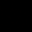

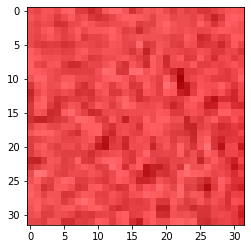

In [7]:
data.shape
# print(data[0])
# np.min(data)
# plt.imshow(data[0])
cv2_imshow(data[0])
plt.imshow(cv2.cvtColor(data[0], cv2.COLOR_BGR2RGB))

### Load Dataset 2

In [ ]:
batch_size = 32
img_height = 32
img_width = 32

directory = '/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/'

train_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

val_ds = tensorflow.keras.utils.image_dataset_from_directory(
  directory,
  class_names=None,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  follow_links=False,
  crop_to_aspect_ratio=False,
  batch_size=batch_size)

Found 5869 files belonging to 11 classes.
Using 4696 files for training.
Found 5869 files belonging to 11 classes.
Using 1173 files for validation.


In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = sorted( train_ds.class_names, key = lambda x:int(x) )
print(class_names)

['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


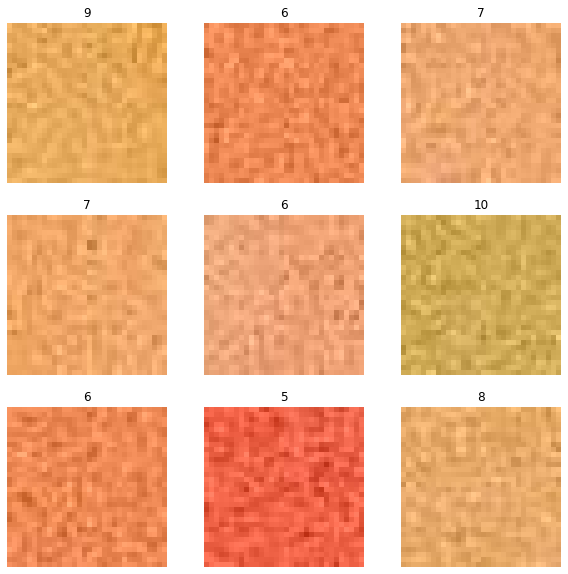

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
count = 0
for images, labels in train_ds.take(-1):
  count = count + 1 
  print(count)

**Train Data**

In [ ]:
train_ls = list(train_ds)

In [ ]:
len(train_ls)
# np.stack(train_np)
print(train_ls[0][0].shape)   

train_np_ds = train_ls[0][0]    # train_ls[0][0] : train data ;  train_ls[0][1] : train label
for i in range(1, len(train_ls)):
  train_np_ds = np.concatenate((train_ls[i][0], train_np_ds), axis=0)
train_np_ds.shape

(32, 32, 32, 3)


(4696, 32, 32, 3)

In [ ]:
# print(train_np_ds[0])
# plt.imshow(int(train_np_ds[0]))

**Train Label**

In [ ]:
train_np_label_ds = train_ls[0][1]    
for i in range(1, len(train_ls)):
  train_np_label_ds = np.concatenate((train_ls[i][1], train_np_label_ds), axis=0)
# train_np_label_ds.shape

In [ ]:
train_np_label_ds = train_np_label_ds.reshape(train_np_label_ds.shape[0], 1)
train_np_label_ds.shape

(4696, 1)

**Split VAL & Test Data**

In [ ]:
val_ls = list(val_ds)

In [ ]:
val_np_ds = val_ls[0][0]
for i in range(1, len(val_ls)):
  val_np_ds = np.concatenate((val_ls[i][0], val_np_ds), axis=0)
val_np_ds.shape

n = len(val_np_ds)//2
test_np_ds = val_np_ds[n:]
val_np_ds = val_np_ds[:n]

In [ ]:
print(val_np_ds.shape, test_np_ds.shape)

(586, 32, 32, 3) (587, 32, 32, 3)


**Split VAL & Test Label**

In [ ]:
val_np_label_ds = val_ls[0][1]
for i in range(1, len(val_ls)):
  val_np_label_ds = np.concatenate((val_ls[i][1], val_np_label_ds), axis=0)
val_np_label_ds.shape

n = len(val_np_label_ds)//2
test_np_label_ds = val_np_label_ds[n:]
val_np_label_ds = val_np_label_ds[:n]

In [ ]:
val_np_label_ds = val_np_label_ds.reshape(val_np_label_ds.shape[0], 1)
test_np_label_ds = test_np_label_ds.reshape(test_np_label_ds.shape[0], 1)
print(val_np_label_ds.shape, test_np_label_ds.shape)

(586, 1) (587, 1)


In [ ]:
train_X_2 = train_np_ds
train_ground = train_np_ds

valid_X_2 = val_np_ds
valid_ground = val_np_ds

In [ ]:
train_X_2.dtype, valid_X_2.dtype
np.max(train_X_2), np.max(valid_X_2)
train_X_2 = train_X_2 / np.max(train_X_2)
valid_X_2 = valid_X_2 / np.max(valid_X_2)
np.max(train_X_2), np.max(valid_X_2)

(1.0, 1.0)

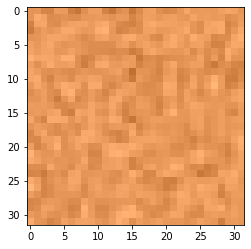

In [ ]:
plt.imshow(train_X_2[0])

## AutoEncoder

### AutoEncoder Model

#### AE1

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #16 x 16 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #8 x 8 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #8 x 8 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 3
    return decoded

#### AE2_encode ONE dim

In [ ]:
def encoder2(input_img):

    encoding_dim = 1

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)

    return encoder_output

def decoder2(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    # conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    # conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2) #32 x 32 x 3
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

#### AE2_encode Two dim

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='relu', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

In [ ]:
def encoder3(input_img):

    encoding_dim = 2

    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='tanh', padding='same')(input_img) #32 x 32 x 32
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #16 x 16 x 64

    conv2 = Conv2D(64, (3, 3), activation='tanh', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #8 x 8 x 128

    conv3 = Conv2D(128, (3, 3), activation='tanh', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)

    pool3 = MaxPooling2D(pool_size=(4, 4))(conv3) #2 x 2 x 128
    conv4 = BatchNormalization()(pool3)

    encoder_output = Flatten()(conv4)
    encoder_output = Dense(encoding_dim)(encoder_output)
    
    return encoder_output

def decoder3(encoder_output):    
    #decoder
    print(encoder_output.shape)
    encoding_dim_2 = 2 * 2 * 128

    encoder_output = Dense(encoding_dim_2)(encoder_output)
    encoder_output = tensorflow.keras.layers.Reshape((2,2,128))(encoder_output)
    
    up1 = UpSampling2D((4,4))(encoder_output) #8 x 8 x 128

    conv5 = Conv2D(128, (3, 3), activation='tanh', padding='same')(up1) #8 x 8 x 128
    conv5 = BatchNormalization()(conv5)

    up1 = UpSampling2D((2,2))(conv5) #16 x 16 x 128

    conv6 = Conv2D(64, (3, 3), activation='tanh', padding='same')(up1) #16 x 16 x 64
    conv6 = BatchNormalization()(conv6)

    up2 = UpSampling2D((2,2))(conv6) #32 x 32 x 64

    conv7 = Conv2D(32, (3, 3), activation='tanh', padding='same')(up2) # 32 x 32 x 32
    conv7 = BatchNormalization()(conv7)

    conv7 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2)
    decoded = BatchNormalization()(conv7)
    print(decoded.shape)

    return decoded

In [ ]:
def train_model():
    input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format
    
    # Encoder 使用卷積層，激活函數用 relu，輸入的維度就是上面定義的 input_img
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)  # 這邊與官方有點不同，我們為編碼器設置了一個名稱，以便能夠訪問它

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional: 4*4*8=128
    
    # Decoder 的過程與 Encoder 正好相反，需要跟 Encoder 的神經網絡層做相對應，相對應的激活函數也是一樣，但這邊在解碼中最後一層使用的激活函數是 sigmoid
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    # 用 Model 來搭建模型，輸入為圖片，輸出是解碼的結果
    autoencoder = Model(input_img, decoded)  
    
    # 編譯模型，optimizer 使用 adam，loss 使用 binary_crossentropy
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    # 訓練 Denoising AE ，輸入是加入雜訊的圖片，輸出是原始圖片

    batch_size = 32
    epochs = 50
    inChannel = 3
    x, y = 32, 32
    input_img = Input(shape = (x, y, inChannel))

    autoencoder_train = autoencoder.fit(train_X, train_X, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

    # autoencoder_train = autoencoder.fit(train_X_2, train_X_2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_2, valid_X_2))

    # autoencoder.save('autoencoder.h5')  # 與官方有點不同的是，多做了保存模型的動作

train_model()

### Training Model

In [ ]:
# coding: utf-8
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision

In [ ]:
# Settings
epochs = 10
batch_size = 128
lr = 0.008


# DataLoader
# train_set = torchvision.datasets.MNIST(
#     root='mnist',
#     train=True,
#     download=True,
#     transform=torchvision.transforms.ToTensor(),
# )

train_loader = data.DataLoader(train_X, batch_size=batch_size, shuffle=True)

In [ ]:
# Model structure
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(1024, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 16),
            nn.Tanh(),
            nn.Linear(16, 2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded

In [ ]:
# Optimizer and loss function
model = AutoEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss()

In [ ]:
# Train
for epoch in range(epochs):
    for data, labels in train_loader:
        inputs = data.view(-1, 1024)

        # Forward
        codes, decoded = model(inputs)

        # Backward
        optimizer.zero_grad()
        loss = loss_function(decoded, inputs)
        loss.backward()
        optimizer.step()

    # Show progress
    print('[{}/{}] Loss:'.format(epoch+1, epochs), loss.item())


ValueError: ignored

In [ ]:
batch_size = 32
epochs = 50
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

In [ ]:
autoencoder = Model(input_img, decoder3(encoder3(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=1e-3))
# autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop(learning_rate=1e-3))

(None, 2)
(None, 32, 32, 3)


In [ ]:
encoder_bottleneck = Model(input_img, encoder3(input_img))

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 64)       256 

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_X, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

# autoencoder_train = autoencoder.fit(train_X_2, train_X_2, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_2, valid_X_2))

Epoch 1/50
82/82 [==============================] - 2s 11ms/step - loss: 1.0609 - val_loss: 0.0829
Epoch 2/50
82/82 [==============================] - 1s 7ms/step - loss: 0.8630 - val_loss: 0.3312
Epoch 3/50
82/82 [==============================] - 1s 8ms/step - loss: 0.7600 - val_loss: 0.8702
Epoch 4/50
82/82 [==============================] - 1s 7ms/step - loss: 0.6052 - val_loss: 0.5628
Epoch 5/50
82/82 [==============================] - 1s 7ms/step - loss: 0.4705 - val_loss: 0.4191
Epoch 6/50
82/82 [==============================] - 1s 7ms/step - loss: 0.3688 - val_loss: 0.3426
Epoch 7/50
82/82 [==============================] - 1s 7ms/step - loss: 0.2519 - val_loss: 0.1664
Epoch 8/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1941 - val_loss: 0.5736
Epoch 9/50
82/82 [==============================] - 1s 7ms/step - loss: 0.1799 - val_loss: 0.1698
Epoch 10/50
82/82 [==============================] - 1s 8ms/step - loss: 0.1326 - val_loss: 0.0786
Epoch 11/50
82/82 

### Save model

In [ ]:
from google.colab import files
import joblib

In [ ]:
autoencoder.save("/content/Jabu_AE_2.h5")
files.download('/content/Jabu_AE_2.h5')

joblib.dump(autoencoder_train, '/content/Jabu_AE_train_history_2')
files.download('/content/Jabu_AE_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
encoder_bottleneck.save("/content/Jabu_AE_bottle_twodim.h5")
files.download('/content/Jabu_AE_bottle_twodim.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE model

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [9]:
autoencoder = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_AE_2.h5')
autoencoder_train = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_AE_train_history_2')
encoder_bottleneck = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_AE_bottle_twodim.h5')

### Evaluate model

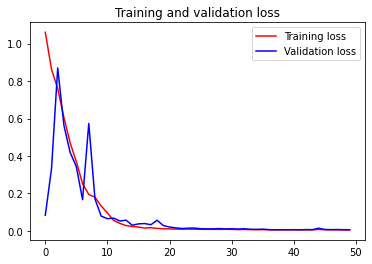

In [10]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
for i, value in enumerate(test_X):
  pre_img = autoencoder.predict(test_X[i:i+1])
  print(mse(test_X[i:i+1], pre_img).numpy())

0.005800694
0.007415008
0.01741365
0.018665738
0.007866603
0.029874599
0.0041083004
0.010271401
0.007271575
0.0031535365
0.028336776
0.010273858
0.006871963
0.00632248
0.0662764
0.02144169
0.008094171
0.06478091
0.036110867
0.036239292
0.013531827
0.019828957
0.012910386
0.021440143
0.015961511
0.007402916
0.013528412
0.005958125
0.025881102
0.061046578
0.007276685
0.010996915
0.005124341
0.00516753
0.044313435
0.011074746
0.00845995
0.0059101433
0.0070249136
0.02379519
0.0119669475
0.006131986
0.027667684
0.032110322
0.009124322
0.034467835
0.028236255
0.024434201
0.0055883466
0.005729874
0.012949963
0.029492717
0.011461345
0.023040093
0.013137864
0.06624898
0.00664077
0.0064247064
0.032676138
0.004138223
0.004615388
0.008545247
0.012257076
0.014807314
0.0074059926
0.02330346
0.027424805
0.00988326
0.0067867516
0.040085737
0.029679788
0.018350346
0.067103736
0.023509264
0.005508498
0.006646515
0.006417147
0.0068024383
0.0072156354
0.006313069
0.012470106
0.011936633
0.025936652
0.0263

In [ ]:
mse = tensorflow.keras.losses.MeanSquaredError()
print(mse(train_X[1:2], pre_img).numpy())

0.020335957


In [ ]:
test_y[0]

array([2])

In [ ]:
test_np_label_ds_reshape= test_y.reshape(-1)
test_np_label_ds_reshape

array([ 2,  5, 10,  1,  8,  3,  8,  2,  2,  3,  0,  1,  6,  5,  0,  9,  5,
       10,  0,  9,  9,  9,  4,  0,  9,  8,  7,  8,  5,  0,  4,  8,  7,  7,
        9,  2,  5,  8,  7,  3,  1,  6,  3,  3,  8,  4,  5,  0,  2,  2,  3,
        5,  6,  9,  4, 10,  7,  8,  1,  8,  4,  8,  6,  7,  4, 10,  0,  4,
        4,  1, 10,  7,  0,  7,  4,  2,  5,  5,  4,  8,  5,  8,  6,  7, 10,
        6,  2,  5,  8,  7, 10, 10,  1, 10,  0,  9,  9,  1,  2,  1, 10,  1,
        4,  6,  1,  9,  3,  7,  5,  2,  3,  0, 10,  6,  0,  5,  6,  0,  5,
        7,  9,  3,  1,  2,  0,  0,  1, 10, 10,  3, 10,  4,  8, 10,  8,  4,
        3,  2,  5,  7,  1,  0,  9,  3,  1,  3,  7, 10,  0,  7,  8,  8,  0,
        3,  7,  2, 10,  9,  3,  5,  9,  6,  0,  9,  7,  0,  8,  1,  0,  8,
        7,  0,  8,  2,  8,  6,  9,  1,  1,  9,  2,  1,  9,  4, 10,  7,  2,
        9,  7,  5,  8,  2,  7,  9,  6,  8,  2,  5,  5,  3,  3,  0,  0, 10,
        6,  3,  7,  5,  8,  5,  3,  9, 10,  0,  5,  9,  5,  1,  4,  9,  8,
        8,  3,  6,  8,  8

In [ ]:
test_X.shape

(817, 32, 32, 3)

Bottle neck info

In [ ]:
encoded_imgs = encoder_bottleneck.predict(test_X)

In [ ]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(encoded_imgs, test_y):
  if l[0] == 0:
    class2.append([t[0],l[0]])
  elif l[0] == 1:
    class3.append([t[0],l[0]])
  elif l[0] == 2:
    class4.append([t[0],l[0]])
  elif l[0] == 3:
    class5.append([t[0],l[0]])
  elif l[0] == 4:
    class6.append([t[0],l[0]])
  elif l[0] == 5:
    class7.append([t[0],l[0]])
  elif l[0] == 6:
    class8.append([t[0],l[0]])    
  elif l[0] == 7:
    class9.append([t[0],l[0]])
  elif l[0] == 8:
    class10.append([t[0],l[0]])
  elif l[0] == 9:
    class11.append([t[0],l[0]])
  elif l[0] == 10:
    class12.append([t[0],l[0]])


print('ph 2 : ')
print("mean:", np.mean(np.array(class2)[:,0]))
print("srd:", np.std(np.array(class2)[:,0]))
# print(class2)

print('-------------------')
print('ph 3 : ')
print("mean:", np.mean(np.array(class3)[:,0]))
print("srd:", np.std(np.array(class3)[:,0]))
# print(class3)

print('-------------------')
print('ph 4 : ')
print("mean:", np.mean(np.array(class4)[:,0]))
print("srd:", np.std(np.array(class4)[:,0]))
# print(class4)

print('-------------------')
print('ph 5 : ')
print("mean:", np.mean(np.array(class5)[:,0]))
print("srd:", np.std(np.array(class5)[:,0]))
# print(class5)

print('-------------------')
print('ph 6 : ')
print("mean:", np.mean(np.array(class6)[:,0]))
print("srd:", np.std(np.array(class6)[:,0]))
# print(class6)

print('-------------------')
print('ph 7 : ')
print("mean:", np.mean(np.array(class7)[:,0]))
print("srd:", np.std(np.array(class7)[:,0]))
# print(class7)

print('-------------------')
print('ph 8 : ')
print("mean:", np.mean(np.array(class8)[:,0]))
print("srd:", np.std(np.array(class8)[:,0]))
# print(class8)

print('-------------------')
print('ph 9 : ')
print("mean:", np.mean(np.array(class9)[:,0]))
print("srd:", np.std(np.array(class9)[:,0]))
# print(class9)

print('-------------------')
print('ph 10 : ')
print("mean:", np.mean(np.array(class10)[:,0]))
print("srd:", np.std(np.array(class10)[:,0]))
# print(class10)

print('-------------------')
print('ph 11 : ')
print("mean:", np.mean(np.array(class11)[:,0]))
print("srd:", np.std(np.array(class11)[:,0]))
# print(class11)

print('-------------------')
print('ph 12 : ')
print("mean:", np.mean(np.array(class12)[:,0]))
print("srd:", np.std(np.array(class12)[:,0]))
# print(class12)

ph 2 : 
mean: -18.904531992398777
srd: 3.577608189807687
-------------------
ph 3 : 
mean: -8.848239391644796
srd: 3.01357607778644
-------------------
ph 4 : 
mean: 0.9176540159744521
srd: 0.9822338744663224
-------------------
ph 5 : 
mean: -3.64736268195239
srd: 1.2628747428723184
-------------------
ph 6 : 
mean: -16.970120152911626
srd: 3.6743263271909337
-------------------
ph 7 : 
mean: -25.519391865957353
srd: 7.901167481785666
-------------------
ph 8 : 
mean: 8.770156420412517
srd: 2.8328413330243705
-------------------
ph 9 : 
mean: -1.068943730941633
srd: 1.7809344764923665
-------------------
ph 10 : 
mean: 9.524079514961494
srd: 3.098598950697628
-------------------
ph 11 : 
mean: 13.28526636119932
srd: 3.9342130015034495
-------------------
ph 12 : 
mean: 12.68093617236028
srd: 1.092843161957594


In [ ]:
encoded_imgs[0]

array([-13.457614,   8.560295], dtype=float32)

PLOT

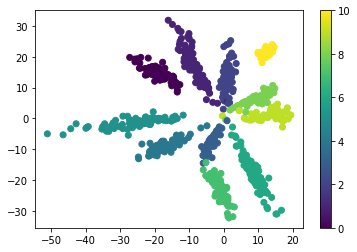

In [ ]:
# plotting
# encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c = test_y)
plt.colorbar()
plt.show()

###AE Decode Image (Predict) 

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
# AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_3.jpg")
# AE_image_crop_test_ph11 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/11/ph11_3.jpg")
# AE_image_crop_test_ph10 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/10/ph10_3.jpg")
# AE_image_crop_test_ph9 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/9/ph9_3.jpg")
# AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_3.jpg")
# AE_image_crop_test_ph7 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/7/ph7_3.jpg")
# AE_image_crop_test_ph6 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/6/ph6_3.jpg")
# AE_image_crop_test_ph5 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/5/ph5_3.jpg")
# AE_image_crop_test_ph4 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/4/ph4_3.jpg")
# AE_image_crop_test_ph3 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/3/ph3_3.jpg")
# AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_3.jpg")

AE_image_crop_test_ph12 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/12/ph12_3.jpg")
AE_image_crop_test_ph11 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/11/ph11_3.jpg")
AE_image_crop_test_ph10 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/10/ph10_3.jpg")
AE_image_crop_test_ph9 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/9/ph9_3.jpg")
AE_image_crop_test_ph8 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/8/ph8_3.jpg")
AE_image_crop_test_ph7 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/7/ph7_3.jpg")
AE_image_crop_test_ph6 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/6/ph6_3.jpg")
AE_image_crop_test_ph5 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/5/ph5_3.jpg")
AE_image_crop_test_ph4 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/4/ph4_3.jpg")
AE_image_crop_test_ph3 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/3/ph3_3.jpg")
AE_image_crop_test_ph2 = cv2.imread("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_crop_image_32*32/2/ph2_3.jpg")

(1, 32, 32, 3)


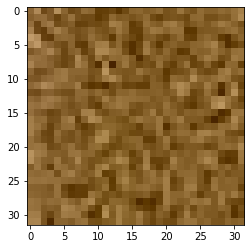

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph12, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

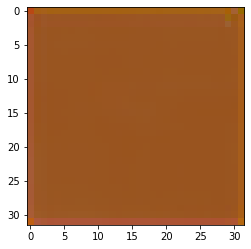

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph12 = encoder_bottleneck.predict(np_AE_image_crop_test_ph12_norm)
print(bottleneck_ph12)

[[12.704633 19.277147]]


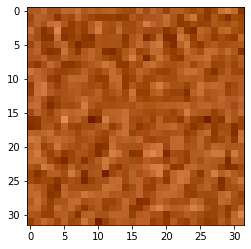

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph11, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph11 = np.array(AE_image_crop_test_ph11)
np_AE_image_crop_test_ph11 = np_AE_image_crop_test_ph11.reshape(1, 32, 32, 3)

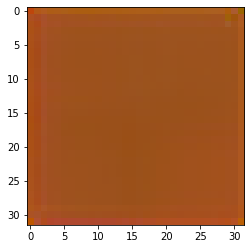

In [ ]:
np_AE_image_crop_test_ph11_norm = np_AE_image_crop_test_ph11 / 255

AE_test_ph11 = autoencoder.predict(np_AE_image_crop_test_ph11_norm)

# print(AE_test_ph12)
AE_test_ph11 = AE_test_ph11.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph11, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph11 = encoder_bottleneck.predict(np_AE_image_crop_test_ph11_norm)
print(bottleneck_ph11)

[[15.441089  3.877188]]


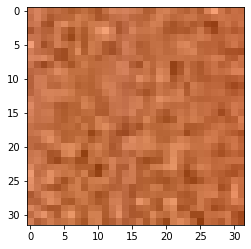

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph10, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph10 = np.array(AE_image_crop_test_ph10)
np_AE_image_crop_test_ph10 = np_AE_image_crop_test_ph10.reshape(1, 32, 32, 3)

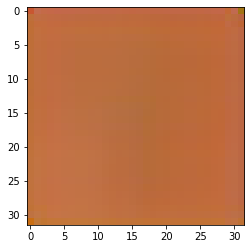

In [ ]:
np_AE_image_crop_test_ph10_norm = np_AE_image_crop_test_ph10 / 255

AE_test_ph10 = autoencoder.predict(np_AE_image_crop_test_ph10_norm)

# print(AE_test_ph12)
AE_test_ph10 = AE_test_ph10.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph10, cv2.COLOR_BGR2RGB))


In [ ]:
bottleneck_ph10 = encoder_bottleneck.predict(np_AE_image_crop_test_ph10_norm)
print(bottleneck_ph10)

[[13.645864   7.8171554]]


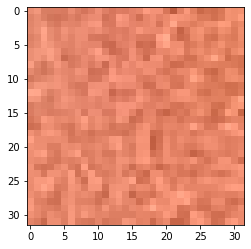

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph9, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph9 = np.array(AE_image_crop_test_ph9)
np_AE_image_crop_test_ph9 = np_AE_image_crop_test_ph9.reshape(1, 32, 32, 3)

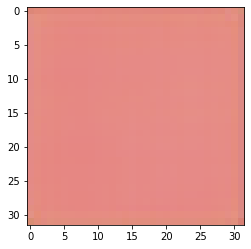

In [ ]:
np_AE_image_crop_test_ph9_norm = np_AE_image_crop_test_ph9 / 255

AE_test_ph9 = autoencoder.predict(np_AE_image_crop_test_ph9_norm)

# print(AE_test_ph12)
AE_test_ph9 = AE_test_ph9.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph9, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph9 = encoder_bottleneck.predict(np_AE_image_crop_test_ph9_norm)
print(bottleneck_ph9)

[[ -1.5746979 -20.86169  ]]


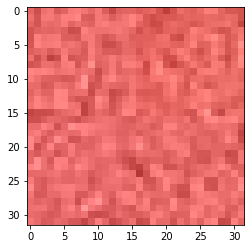

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph8, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph8 = np.array(AE_image_crop_test_ph8)
np_AE_image_crop_test_ph8 = np_AE_image_crop_test_ph8.reshape(1, 32, 32, 3)

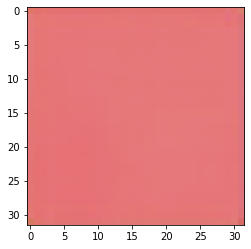

In [ ]:
np_AE_image_crop_test_ph8_norm = np_AE_image_crop_test_ph8 / 255

AE_test_ph8 = autoencoder.predict(np_AE_image_crop_test_ph8_norm)

# print(AE_test_ph12)
AE_test_ph8 = AE_test_ph8.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph8, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph8 = encoder_bottleneck.predict(np_AE_image_crop_test_ph8_norm)
print(bottleneck_ph8)

[[ 4.978823 -8.821377]]


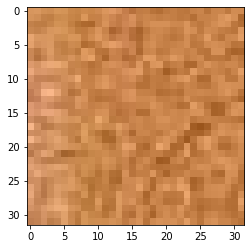

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph7, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph7 = np.array(AE_image_crop_test_ph7)
np_AE_image_crop_test_ph7 = np_AE_image_crop_test_ph7.reshape(1, 32, 32, 3)

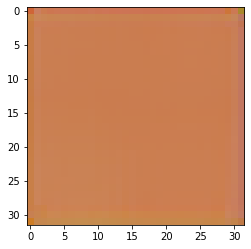

In [ ]:
np_AE_image_crop_test_ph7_norm = np_AE_image_crop_test_ph7 / 255

AE_test_ph7 = autoencoder.predict(np_AE_image_crop_test_ph7_norm)

# print(AE_test_ph12)
AE_test_ph7 = AE_test_ph7.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph7, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph7 = encoder_bottleneck.predict(np_AE_image_crop_test_ph7_norm)
print(bottleneck_ph7)

[[-19.073374    -0.47702736]]


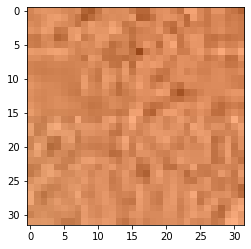

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph6, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph6 = np.array(AE_image_crop_test_ph6)
np_AE_image_crop_test_ph6 = np_AE_image_crop_test_ph6.reshape(1, 32, 32, 3)

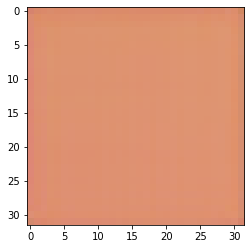

In [ ]:
np_AE_image_crop_test_ph6_norm = np_AE_image_crop_test_ph6 / 255

AE_test_ph6 = autoencoder.predict(np_AE_image_crop_test_ph6_norm)

# print(AE_test_ph12)
AE_test_ph6 = AE_test_ph6.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph6, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph6 = encoder_bottleneck.predict(np_AE_image_crop_test_ph6_norm)
print(bottleneck_ph6)

[[-10.4569435  -3.8626003]]


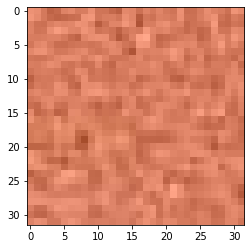

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph5, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph5 = np.array(AE_image_crop_test_ph5)
np_AE_image_crop_test_ph5 = np_AE_image_crop_test_ph5.reshape(1, 32, 32, 3)

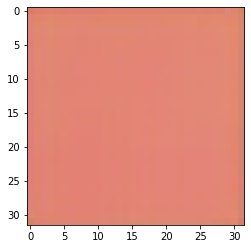

In [ ]:
np_AE_image_crop_test_ph5_norm = np_AE_image_crop_test_ph5 / 255

AE_test_ph5 = autoencoder.predict(np_AE_image_crop_test_ph5_norm)

# print(AE_test_ph12)
AE_test_ph5 = AE_test_ph5.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph5, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph5 = encoder_bottleneck.predict(np_AE_image_crop_test_ph5_norm)
print(bottleneck_ph5)

[[-2.9741104 -5.4605203]]


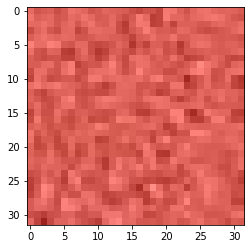

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph4, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph4 = np.array(AE_image_crop_test_ph4)
np_AE_image_crop_test_ph4 = np_AE_image_crop_test_ph4.reshape(1, 32, 32, 3)

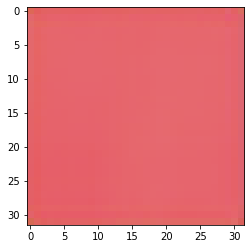

In [ ]:
np_AE_image_crop_test_ph4_norm = np_AE_image_crop_test_ph4 / 255

AE_test_ph4 = autoencoder.predict(np_AE_image_crop_test_ph4_norm)

# print(AE_test_ph12)
AE_test_ph4 = AE_test_ph4.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph4, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph4 = encoder_bottleneck.predict(np_AE_image_crop_test_ph4_norm)
print(bottleneck_ph4)

[[ 3.0107949 16.012405 ]]


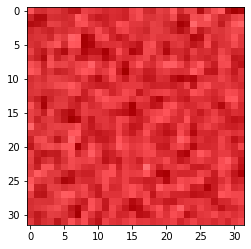

In [ ]:

# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph3, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph3 = np.array(AE_image_crop_test_ph3)
np_AE_image_crop_test_ph3 = np_AE_image_crop_test_ph3.reshape(1, 32, 32, 3)

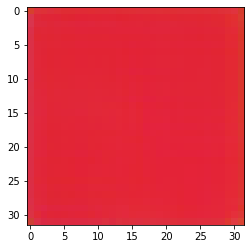

In [ ]:
np_AE_image_crop_test_ph3_norm = np_AE_image_crop_test_ph3 / 255

AE_test_ph3 = autoencoder.predict(np_AE_image_crop_test_ph3_norm)

# print(AE_test_ph12)
AE_test_ph3 = AE_test_ph3.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph3, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph3 = encoder_bottleneck.predict(np_AE_image_crop_test_ph3_norm)
print(bottleneck_ph3)

[[-9.339229 23.006071]]


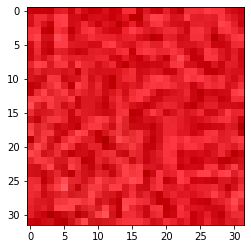

In [ ]:
# plt.imshow(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)

plt.imshow(cv2.cvtColor(AE_image_crop_test_ph2, cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

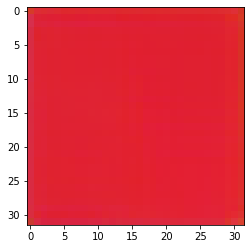

In [ ]:
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)

# print(AE_test_ph12)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
bottleneck_ph2 = encoder_bottleneck.predict(np_AE_image_crop_test_ph2_norm)
print(bottleneck_ph2)

[[-17.150507  15.905126]]


### (testing) AE Decode Image

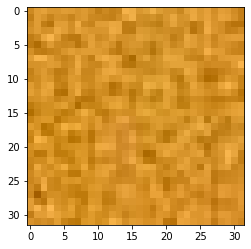

In [ ]:
for i in range(3):
  plt.imshow(cv2.cvtColor(test_X[], cv2.COLOR_BGR2RGB))
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
AE_image_crop_test_ph12 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg")

AE_image_crop_test_ph2 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/2/ph2_10.jpg")

AE_image_crop_test_ph8 = Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/8/ph8_10.jpg")

(1, 32, 32, 3)


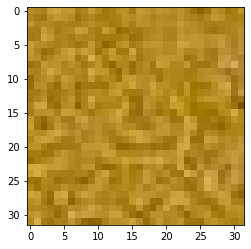

In [ ]:
plt.imshow(AE_image_crop_test_ph12)

# img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
# np_AE_image_crop_test_ph12 = np.array(img)
# np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
# print(np_AE_image_crop_test_ph12.shape)
np_AE_image_crop_test_ph12 = np.array(AE_image_crop_test_ph12)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32/12/ph12_10.jpg')
np_AE_image_crop_test_ph12 = np.array(img)
np_AE_image_crop_test_ph12 = np_AE_image_crop_test_ph12.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph12.shape)

(1, 32, 32, 3)


In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)

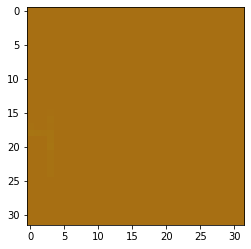

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
# plt.imshow(AE_test_ph12)
plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

(1, 32, 32, 3)


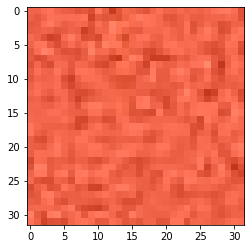

In [ ]:
plt.imshow(AE_image_crop_test_ph2)
# img = cv2.imread("/content/gdrive/MyDrive/NCHU/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_56_56/2/ph2_10.jpg")
# res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
# res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
np_AE_image_crop_test_ph2 = np.array(AE_image_crop_test_ph2)
np_AE_image_crop_test_ph2 = np_AE_image_crop_test_ph2.reshape(1, 32, 32, 3)
print(np_AE_image_crop_test_ph2.shape)

In [ ]:
np_AE_image_crop_test_ph12_norm = np_AE_image_crop_test_ph12 / 255
np_AE_image_crop_test_ph2_norm = np_AE_image_crop_test_ph2 / 255

In [ ]:
AE_test_ph12 = autoencoder.predict(np_AE_image_crop_test_ph12_norm)
AE_test_ph2 = autoencoder.predict(np_AE_image_crop_test_ph2_norm)
AE_test_ph12.shape
AE_test_ph2.shape

(1, 32, 32, 3)

In [ ]:
aa = ( AE_test_ph12 - np.min(AE_test_ph12) ) * 255 / ( np.max(AE_test_ph12) - np.min(AE_test_ph12) )

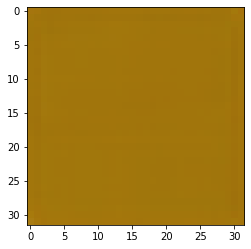

In [ ]:
# print(AE_test_ph12)
AE_test_ph12 = AE_test_ph12.reshape(32, 32, 3)
plt.imshow(AE_test_ph12)
# plt.imshow(cv2.cvtColor(AE_test_ph12, cv2.COLOR_BGR2RGB))

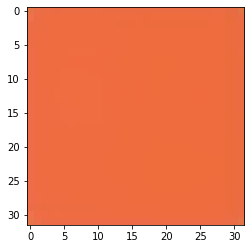

In [ ]:
# print(AE_test_2)
AE_test_ph2 = AE_test_ph2.reshape(32, 32, 3)
plt.imshow(AE_test_ph2)
# plt.imshow(cv2.cvtColor(AE_test_ph2, cv2.COLOR_BGR2RGB))

In [ ]:
train_X_2.shape

(4696, 32, 32, 3)

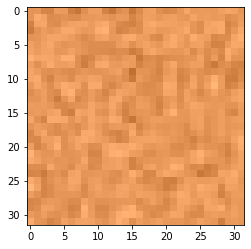

In [ ]:
plt.imshow(train_X_2[0])

In [ ]:
train_np_ds.shape

(4696, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


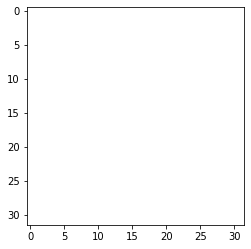

In [ ]:
plt.imshow(train_np_ds[0])

### AE Classifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.models import Model

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [4]
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[ 4]
 [ 4]
 [ 9]
 [ 8]
 [ 8]
 [ 0]
 [ 7]
 [ 0]
 [ 4]
 [10]]


In [ ]:
num_classes = 11
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

# activation='softmax' activation='sigmoid

In [ ]:
# batch_size = 32
# epochs = 30
# inChannel = 3
# x, y = 32, 32
# input_img = Input(shape = (x, y, inChannel))

In [ ]:
encode = encoder_bottleneck(input_img)
full_model = Model(input_img, fc(encode))

(None, 11)


In [ ]:
encode.shape

TensorShape([None, 2])

In [ ]:
# full_model.compile(optimizer='adam',
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])


# compile model
full_model.compile(loss = keras.losses.mse, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4) ,metrics=['accuracy'])

In [ ]:
full_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model_3 (Functional)        (None, 2)                 95682     
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 11)                1419      
                                                                 
Total params: 97,485
Trainable params: 96,781
Non-trainable params: 704
_________________________________________________________________


In [ ]:
history_classify = full_model.fit(train_X, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 3s 8ms/step - loss: 0.0896 - accuracy: 0.1608 - val_loss: 0.0775 - val_accuracy: 0.2910
Epoch 2/100
82/82 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.3465 - val_loss: 0.0586 - val_accuracy: 0.3798
Epoch 3/100
82/82 [==============================] - 0s 5ms/step - loss: 0.0590 - accuracy: 0.3557 - val_loss: 0.0541 - val_accuracy: 0.3798
Epoch 4/100
82/82 [==============================] - 0s 6ms/step - loss: 0.0522 - accuracy: 0.4544 - val_loss: 0.0472 - val_accuracy: 0.5758
Epoch 5/100
82/82 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.6168 - val_loss: 0.0356 - val_accuracy: 0.6845
Epoch 6/100
82/82 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.6769 - val_loss: 0.0389 - val_accuracy: 0.6386
Epoch 7/100
82/82 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.6884 - val_loss: 0.0303 - val_accuracy: 0.6983
Epoch 8/100
8

### Save classifier model

In [ ]:
full_model.save("/content/Jabu_AE_2_FC.h5")
files.download('/content/Jabu_AE_2_FC.h5')

joblib.dump(history_classify, '/content/Jabu_AE_FC_train_history_2')
files.download('/content/Jabu_AE_FC_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load AE classifier model

In [11]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_AE_2_FC.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_AE_FC_train_history_2')

# full_model = load_model('/content/PEPE_AE_2_FC.h5')
# history_classify = joblib.load('/content/PEPE_AE_FC_train_history_2')

### Evaluate classifier model

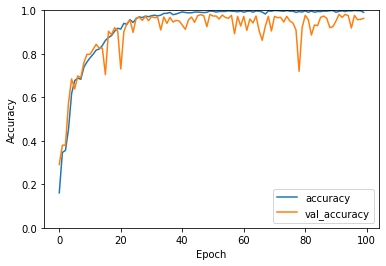

In [12]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.0035
Test accuracy: 0.978


In [ ]:
pre_img_test = full_model.predict(test_X)
pre_img_train = full_model.predict(train_X)

In [ ]:
test_X.shape

(817, 32, 32, 3)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[9.5396876e-01 3.8457297e-02 6.3179973e-06 4.0320788e-11 4.1780177e-11
 1.1212456e-06 4.3271341e-11 8.4436969e-10 7.4231025e-06 7.5590066e-03
 4.2134812e-13]
0.95396876
0
0.99999994


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(817,)

In [ ]:
pre_img[4], test_y[4]

(9, array([9]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[63  2  0  0  0  0  0  0  0  0  0]
 [ 0 74  1  0  0  0  0  0  0  0  0]
 [ 0  0 75  0  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0  0  0  0]
 [ 2  0  0  0 66  0  0  0  6  0  0]
 [ 0  0  0  0  0 83  0  0  0  1  0]
 [ 0  0  2  0  0  0 82  0  0  0  0]
 [ 0  0  0  0  0  0  0 82  0  0  0]
 [ 1  0  0  0  0  0  0  0 73  2  0]
 [ 0  0  0  0  0  0  0  0  3 61  0]
 [ 0  0  0  0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.97      0.99      0.98        75
           2       0.96      1.00      0.98        75
           3       1.00      1.00      1.00        77
           4       1.00      0.89      0.94        74
           5       1.00      0.99      0.99        84
           6       1.00      0.98      0.99        84
           7       1.00      1.00      1.00        82
           8       0.89      0.96      0.92        76
           9       0.95      0.95      0.95        64
        

Text(33.0, 0.5, 'True Label')

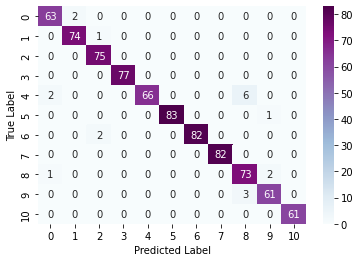

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### AE_2dim plot

In [13]:
encoded_data = encoder_bottleneck.predict(test_X)
encoded_data.shape

(817, 2)

In [14]:
encoded_data_pred_2 = pd.DataFrame(data = encoded_data
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2['label'] = test_y + 2

In [15]:
encoded_data_pred_2.head()

,principal component 1,principal component 2,label
0,-1.447594,-21.970036,9
1,-11.017573,21.933086,3
2,-1.193265,-20.704643,9
3,-17.152189,-9.409952,6
4,-18.304670,15.113391,2


In [72]:
encoded_data_pred_2_normilize = (encoded_data_pred_2.iloc[:,:-1] - np.min(encoded_data_pred_2.iloc[:,:-1])) / (np.max(encoded_data_pred_2.iloc[:,:-1]) - np.min(encoded_data_pred_2.iloc[:,:-1])) * 100

In [73]:
encoded_data_pred_2_norm = pd.DataFrame(data = encoded_data_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
encoded_data_pred_2_norm['label'] = test_y + 2

In [74]:
encoded_data_pred_2_norm

,principal component 1,principal component 2,label
0,69.156494,17.330050,9
1,55.192642,86.455811,3
2,69.527603,19.322418,9
3,46.241440,37.105984,6
4,44.559814,75.718155,2
...,...,...,...
812,74.643021,85.284782,4
813,64.180779,31.929546,5
814,69.438278,17.046667,9
815,56.908600,76.596092,3


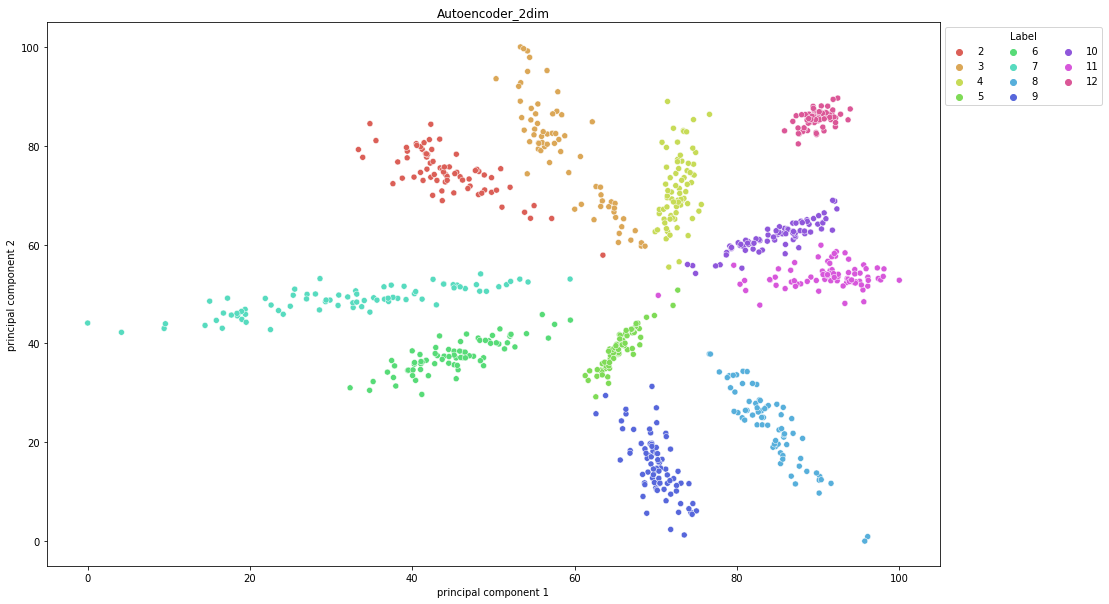

In [75]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= encoded_data_pred_2_norm,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### AE_mean plot

In [18]:
encoded_data_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,-13.266948,11.233046
1,12.681922,0.518669
2,-12.042973,18.196949
3,-3.370235,-12.695135
4,16.480474,1.659351
...,...,...
812,-1.423280,-24.063725
813,-0.312303,8.852250
814,-4.121320,-7.694764
815,13.286807,21.934736


In [ ]:
np.min(encoded_data_pred_2.iloc[:,:-1])

principal component 1   -44.355858
principal component 2   -32.976688
dtype: float32

In [ ]:
np.max(encoded_data_pred_2.iloc[:,:-1])

principal component 1    20.047808
principal component 2    31.308889
dtype: float32

In [ ]:
encoded_data_pred_2.iloc[:,2:3]

,label
0,11
1,7
2,4
3,3
4,7
...,...
812,9
813,4
814,3
815,10


In [76]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(encoded_data_pred_2_norm), np.array(encoded_data_pred_2_norm.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [77]:
number_of_elements = len(class12)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  64


In [78]:
mean_x_AE = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_AE)

[44.45026601871974, 58.86258387911147, 72.70621758538323, 65.53865814208984, 45.14967544555664, 31.844718619237973, 84.17818859261526, 70.06848337510053, 84.70626907348633, 91.1619610256619, 89.95414018630981]


In [79]:
mean_XX_AE = np.mean(mean_x_AE)
print(mean_XX_AE)

67.14737835847933


In [80]:
mean_y_AE = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_AE)

[74.57971148423745, 78.60915684354478, 71.25342013384845, 38.90307418037863, 37.48027483622233, 48.729203815701645, 23.334036535780196, 15.196175974958082, 61.594429111480714, 53.57799774923442, 85.44458734989166]


In [81]:
mean_YY_AE = np.mean(mean_y_AE)
print(mean_YY_AE)

53.518369819570765


In [82]:
AE_mean_ph = pd.DataFrame(data = zip(mean_x_AE, mean_y_AE)
             , columns = ['principal component 1', 'principal component 2'])
AE_mean_ph['label'] = AE_mean_ph.index + 2

print(round(AE_mean_ph, 4))

    principal component 1  principal component 2  label
0                 44.4503                74.5797      2
1                 58.8626                78.6092      3
2                 72.7062                71.2534      4
3                 65.5387                38.9031      5
4                 45.1497                37.4803      6
5                 31.8447                48.7292      7
6                 84.1782                23.3340      8
7                 70.0685                15.1962      9
8                 84.7063                61.5944     10
9                 91.1620                53.5780     11
10                89.9541                85.4446     12


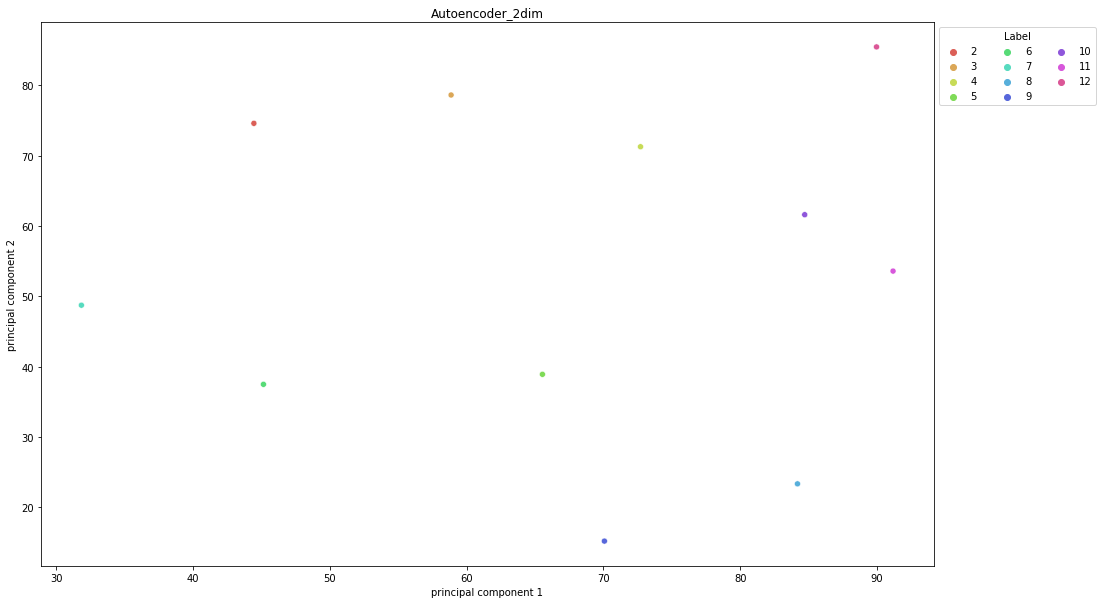

In [83]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= AE_mean_ph,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [25]:
encoded_data_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,-1.447594,-21.970036,9
1,-11.017573,21.933086,3
2,-1.193265,-20.704643,9
3,-17.152189,-9.409952,6
4,-18.304670,15.113391,2
...,...,...,...
812,2.312539,21.189341,4
813,-4.857651,-12.697609,5
814,-1.254478,-22.150017,9
815,-9.841562,15.670986,3


In [84]:
class_feature_means_AE = pd.DataFrame()
for c, rows in encoded_data_pred_2_norm.groupby('label'):
    class_feature_means_AE[c] = rows.mean()
class_feature_means_AE

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,44.450264,58.862579,72.706215,65.538651,45.149673,31.844717,84.178192,70.068489,84.706268,91.161949,89.954124
principal component 2,74.579704,78.609154,71.253418,38.903080,37.480270,48.729221,23.334038,15.196176,61.594433,53.577991,85.444580
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [85]:
class_feature_means_AE.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,44.450264,58.862579,72.706215,65.538651,45.149673,31.844717,84.178192,70.068489,84.706268,91.161949,89.954124
principal component 2,74.579704,78.609154,71.253418,38.903080,37.480270,48.729221,23.334038,15.196176,61.594433,53.577991,85.444580


In [86]:
print(mean_XX_AE, mean_YY_AE)

67.14737835847933 53.518369819570765


In [87]:
aa = class_feature_means_AE.iloc[:1,:] - mean_XX_AE
bb = class_feature_means_AE.iloc[1:2,:] - mean_YY_AE

In [88]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,21.061334,25.090784,17.735048,-14.61529,-16.038099,-4.789148,-30.184332,-38.322194,8.076063,0.059622,31.92621


In [89]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [90]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_AE = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_AE)) 

28.1085


In [91]:
all_class_AE = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_AE[m]):

    sum += np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_AE.iloc[0,m])**2 + (y - class_feature_means_AE.iloc[1,m])**2))
    print(x, y, np.array(class_feature_means_AE.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  print(i+1)
  print(sum)

within_class_AE = sum2/11
print("{:.4f}".format(within_class_AE)) 


 ph  2
44.559814453125 75.71815490722656 [44.45026398 74.57970428]
45.112945556640625 70.45654296875 [44.45026398 74.57970428]
48.91210174560547 71.05632781982422 [44.45026398 74.57970428]
43.373741149902344 81.33783721923828 [44.45026398 74.57970428]
43.42931365966797 75.51081848144531 [44.45026398 74.57970428]
41.32248306274414 72.982666015625 [44.45026398 74.57970428]
48.151912689208984 70.11701202392578 [44.45026398 74.57970428]
63.484825134277344 57.86138916015625 [44.45026398 74.57970428]
45.485694885253906 74.61563110351562 [44.45026398 74.57970428]
48.55820083618164 70.40872192382812 [44.45026398 74.57970428]
33.89265060424805 77.65367889404297 [44.45026398 74.57970428]
42.27674865722656 73.6339111328125 [44.45026398 74.57970428]
48.86836242675781 74.08372497558594 [44.45026398 74.57970428]
49.766876220703125 70.58650970458984 [44.45026398 74.57970428]
39.364315032958984 77.55506896972656 [44.45026398 74.57970428]
42.398826599121094 79.2542495727539 [44.45026398 74.57970428]
4

In [92]:
print("{:.4f}".format(within_class_AE))

5.8333


In [93]:
print("{:.4f}".format(between_class_AE / within_class_AE)) 

4.8187


In [ ]:

x, y, _ = class2[0]

testsum = np.sqrt((x - class_feature_means.iloc[0,0])**2 + (y - class_feature_means.iloc[1,0])**2)
print(x, y, np.array(class_feature_means.iloc[:2,0]))

print(testsum)



0.19626385 -0.022941753 [ 0.20877524 -0.02670655]
0.013065545712903116


## PCA

In [36]:
import pandas as pd
from sklearn.decomposition import PCA

### verify train data

In [ ]:
print('Traning data shape:', train_X.shape)
print('Testing data shape:', test_X.shape)

Traning data shape: (4695, 32, 32, 3)
Testing data shape: (1174, 32, 32, 3)


In [ ]:
train_y.shape, test_y.shape

((4695, 1), (1174, 1))

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
label_dict = {
 0: 'PH2',
 1: 'PH3',
 2: 'PH4',
 3: 'PH5',
 4: 'PH6',
 5: 'PH7',
 6: 'PH8',
 7: 'PH9',
 8: 'PH10',
 9: 'PH11',
 10: 'PH12',
}

Text(0.5, 1.0, '(Label: PH2)')
Text(0.5, 1.0, '(Label: PH4)')


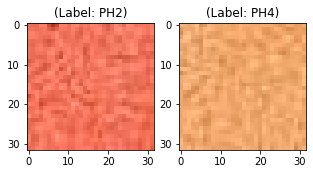

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_X[0], (32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[train_y[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(test_X[0],(32,32,3))

plt.imshow(cv2.cvtColor(curr_img, cv2.COLOR_BGR2RGB))
# plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[test_y[0][0]]) + ")"))

### Data Preprocessing


In [37]:
np.min(train_X),np.max(train_X)
np.min(test_X),np.max(test_X)

(0.0, 1.0)

In [38]:
x_train = train_X/255.0
np.min(x_train),np.max(x_train)

x_test = test_X/255.0
np.min(x_test),np.max(x_test)

(0.0, 0.003921569)

In [39]:
x_train.shape, x_test.shape

((3265, 32, 32, 3), (817, 32, 32, 3))

In [40]:
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)
x_train_flat.shape, x_test_flat.shape

((3265, 3072), (817, 3072))

In [41]:
feat_cols_train = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]

In [42]:
df_dataset_train = pd.DataFrame(x_train_flat, columns=feat_cols_train)
df_dataset_test = pd.DataFrame(x_test_flat, columns=feat_cols_test)

In [43]:
df_dataset_train['label'] = train_y
print('Size of the dataframe: {}'.format(df_dataset_train.shape))

df_dataset_test['label'] = test_y
print('Size of the dataframe: {}'.format(df_dataset_test.shape))

Size of the dataframe: (3265, 3073)
Size of the dataframe: (817, 3073)


In [44]:
# df_dataset_train.head()
df_dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.001922,0.002338,0.003660,0.001861,0.002276,0.003599,0.001799,0.002215,0.003537,0.002030,...,0.001938,0.002414,0.003722,0.001876,0.002353,0.003660,0.001907,0.002384,0.003691,7
1,0.000784,0.000692,0.003168,0.001246,0.001153,0.003629,0.001107,0.001015,0.003491,0.001169,...,0.001261,0.001092,0.003506,0.001399,0.001230,0.003645,0.001123,0.000953,0.003368,1
2,0.001984,0.002399,0.003629,0.002153,0.002568,0.003799,0.001984,0.002399,0.003629,0.001799,...,0.001476,0.001892,0.003214,0.001492,0.001907,0.003230,0.001861,0.002276,0.003599,7
3,0.001476,0.002138,0.003168,0.001845,0.002507,0.003537,0.001922,0.002584,0.003614,0.001661,...,0.002045,0.002691,0.003752,0.001892,0.002537,0.003599,0.002030,0.002676,0.003737,4
4,0.001292,0.001153,0.003922,0.001323,0.001184,0.003922,0.001061,0.000923,0.003691,0.000984,...,0.000800,0.000707,0.003368,0.001138,0.001046,0.003706,0.001353,0.001261,0.003922,0


In [45]:
df_dataset_test.shape

(817, 3073)

### PCA fit transform

In [46]:
df_dataset_train.iloc[:,:-1].shape

(3265, 3072)

In [47]:
pca_dataset_train_2 = PCA(n_components=2)
# pca_dataset_train_2.fit(df_dataset_train.iloc[:,:-1])
pca_dataset_train_2.fit(x_train_flat)
# principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(df_dataset_test.iloc[:,:-1])
principalComponents_ds_test_pred_2 = pca_dataset_train_2.transform(x_test_flat)

In [48]:
principalComponents_ds_test_pred_2.shape

(817, 2)

In [49]:
principal_ds_Df_pred_2 = pd.DataFrame(data = principalComponents_ds_test_pred_2
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2['label'] = test_y + 2

In [50]:
principal_ds_Df_pred_2.head()

,principal component 1,principal component 2,label
0,-0.021109,-0.001853,9
1,0.016833,-0.017730,3
2,-0.021842,-0.002110,9
3,-0.022502,0.004086,6
4,0.025952,-0.022237,2


In [51]:
principal_ds_Df_pred_2.shape

(817, 3)

In [94]:
principal_ds_Df_pred_2_normilize = (principal_ds_Df_pred_2.iloc[:,:-1] - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) / (np.max(principal_ds_Df_pred_2.iloc[:,:-1]) - np.min(principal_ds_Df_pred_2.iloc[:,:-1])) * 100

In [95]:
principal_ds_Df_pred_2_norm = pd.DataFrame(data = principal_ds_Df_pred_2_normilize
             , columns = ['principal component 1', 'principal component 2'])
principal_ds_Df_pred_2_norm['label'] = test_y + 2

In [96]:
principal_ds_Df_pred_2_norm

,principal component 1,principal component 2,label
0,25.107294,39.439636,9
1,65.266113,12.670133,3
2,24.331110,39.006256,9
3,23.632841,49.453537,6
4,74.917778,5.071072,2
...,...,...,...
812,60.083302,29.070288,4
813,18.752552,43.293266,5
814,10.752555,40.960289,9
815,79.289909,11.791851,3


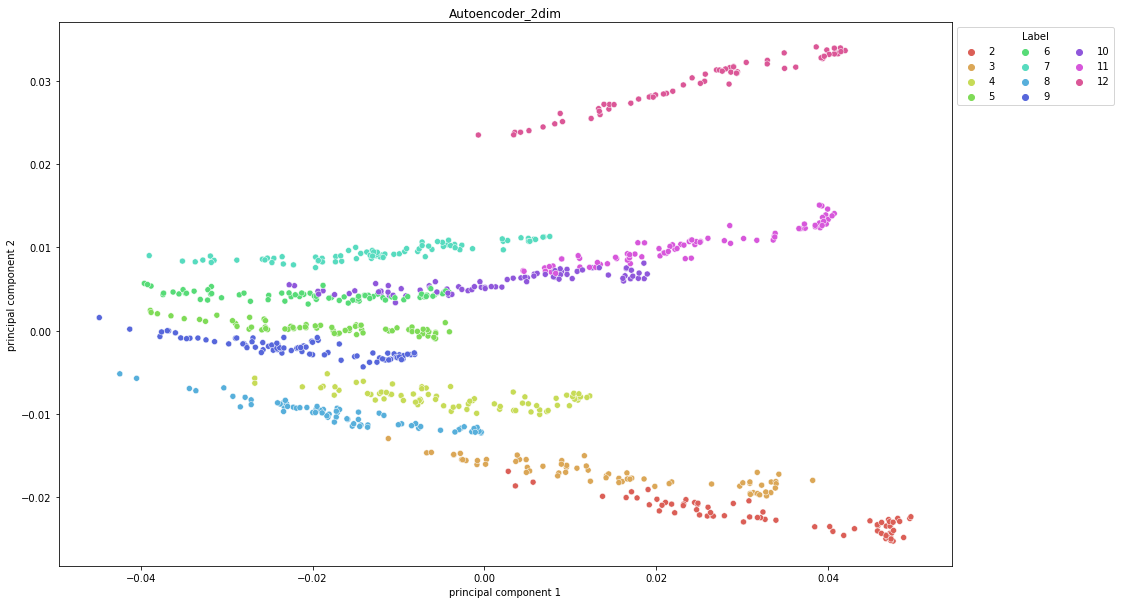

In [52]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2,
    legend="full",
)
ax.set(title='Autoencoder_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

[Text(0.5, 1.0, 'PCA_train_2dim')]

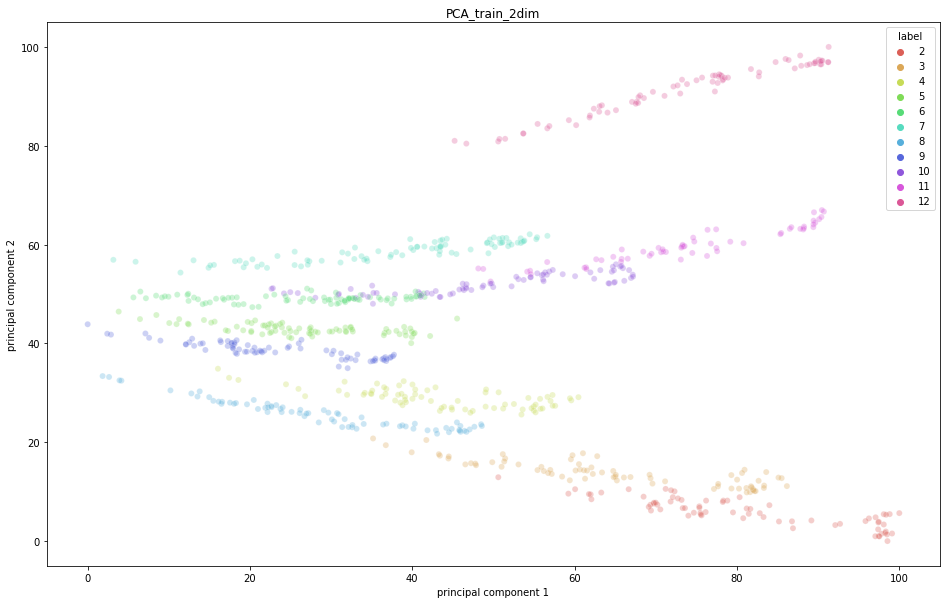

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= principal_ds_Df_pred_2_norm,
    legend="full",
    alpha=0.3,
).set(title='PCA_train_2dim')


有两个PCA类的成员值得关注。第一个是explained_variance_，它代表降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。第二个是explained_variance_ratio_，它代表降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。

In [ ]:
print("各主成分方向：\n",pca_dataset_train_2.components_.shape)
print('Explained variation per principal component: {}'.format(pca_dataset_train_2.explained_variance_ratio_))
print(format(pca_dataset_train_2.explained_variance_))
print(format(pca_dataset_train_2.singular_values_))

各主成分方向：
 (2, 3072)
Explained variation per principal component: [0.5731848  0.21317622]
[0.00048446 0.00018018]
[1.2574891 0.766878 ]


### PCA_mean plot

In [53]:
principal_ds_Df_pred_2.iloc[:,:-1]

,principal component 1,principal component 2
0,-0.021109,-0.001853
1,0.016833,-0.017730
2,-0.021842,-0.002110
3,-0.022502,0.004086
4,0.025952,-0.022237
...,...,...
812,0.011937,-0.008003
813,-0.027113,0.000433
814,-0.034671,-0.000951
815,0.030083,-0.018251


In [97]:
principal_ds_Df_pred_2_norm.iloc[:,2:3]

,label
0,9
1,3
2,9
3,6
4,2
...,...
812,4
813,5
814,9
815,3


In [127]:
class2 = []
class3 = []
class4 = []
class5 = []
class6 = []
class7 = []
class8 = []
class9 = []
class10 = []
class11 = []
class12 = []


for t, l in zip(np.array(principal_ds_Df_pred_2.iloc[:,:-1]), np.array(principal_ds_Df_pred_2.iloc[:,2:3])):
  # print(l.shape)
  if l[0] == 2:
    class2.append([t[0], t[1], l[0]])
  elif l[0] == 3:
    class3.append([t[0], t[1], l[0]])
  elif l[0] == 4:
    class4.append([t[0], t[1], l[0]])
  elif l[0] == 5:
    class5.append([t[0], t[1], l[0]])
  elif l[0] == 6:
    class6.append([t[0], t[1], l[0]])
  elif l[0] == 7:
    class7.append([t[0], t[1], l[0]])
  elif l[0] == 8:
    class8.append([t[0], t[1], l[0]])    
  elif l[0] == 9:
    class9.append([t[0], t[1], l[0]])
  elif l[0] == 10:
    class10.append([t[0], t[1], l[0]])
  elif l[0] == 11:
    class11.append([t[0], t[1], l[0]])
  elif l[0] == 12:
    class12.append([t[0], t[1], l[0]])


In [128]:
number_of_elements = len(class12)
print("Number of elements in the list: ", number_of_elements)

Number of elements in the list:  64


In [129]:
mean_x_PCA = [
    np.mean(np.array(class2)[:,:1]),
    np.mean(np.array(class3)[:,:1]),
    np.mean(np.array(class4)[:,:1]),
    np.mean(np.array(class5)[:,:1]),
    np.mean(np.array(class6)[:,:1]),
    np.mean(np.array(class7)[:,:1]),
    np.mean(np.array(class8)[:,:1]),
    np.mean(np.array(class9)[:,:1]),
    np.mean(np.array(class10)[:,:1]),
    np.mean(np.array(class11)[:,:1]),
    np.mean(np.array(class12)[:,:1]),
] 
print(mean_x_PCA)

[0.0338546327498912, 0.015217163896127402, -0.003507822148684362, -0.018433579675141063, -0.01977910926565528, -0.011980779379122902, -0.016744652124364455, -0.021667132515679387, 0.0012524395700893366, 0.024044415263896002, 0.025159719287330518]


In [130]:
mean_XX_PCA = np.mean(mean_x_PCA)
print(mean_XX_PCA)

0.0006741177871533652


In [131]:
mean_y_PCA = [
    np.mean(np.array(class2)[:,1:2]),
    np.mean(np.array(class3)[:,1:2]),
    np.mean(np.array(class4)[:,1:2]),
    np.mean(np.array(class5)[:,1:2]),
    np.mean(np.array(class6)[:,1:2]),
    np.mean(np.array(class7)[:,1:2]),
    np.mean(np.array(class8)[:,1:2]),
    np.mean(np.array(class9)[:,1:2]),
    np.mean(np.array(class10)[:,1:2]),
    np.mean(np.array(class11)[:,1:2]),
    np.mean(np.array(class12)[:,1:2]),
] 
print(mean_y_PCA)

[-0.022292564216424043, -0.017131522473325764, -0.008054882917251135, 0.0003888902248464172, 0.004251529419173797, 0.009459972075080569, -0.010003755078978941, -0.002044209907420308, 0.00579880999866873, 0.010333535433919341, 0.02972497741575353]


In [132]:
mean_YY_PCA = np.mean(mean_y_PCA)
print(mean_YY_PCA)

3.9161815822017573e-05


In [133]:
PCA_mean_ph = pd.DataFrame(data = zip(mean_x_PCA, mean_y_PCA)
             , columns = ['principal component 1', 'principal component 2'])
PCA_mean_ph['label'] = PCA_mean_ph.index + 2

print(round(PCA_mean_ph, 4))

    principal component 1  principal component 2  label
0                  0.0339                -0.0223      2
1                  0.0152                -0.0171      3
2                 -0.0035                -0.0081      4
3                 -0.0184                 0.0004      5
4                 -0.0198                 0.0043      6
5                 -0.0120                 0.0095      7
6                 -0.0167                -0.0100      8
7                 -0.0217                -0.0020      9
8                  0.0013                 0.0058     10
9                  0.0240                 0.0103     11
10                 0.0252                 0.0297     12


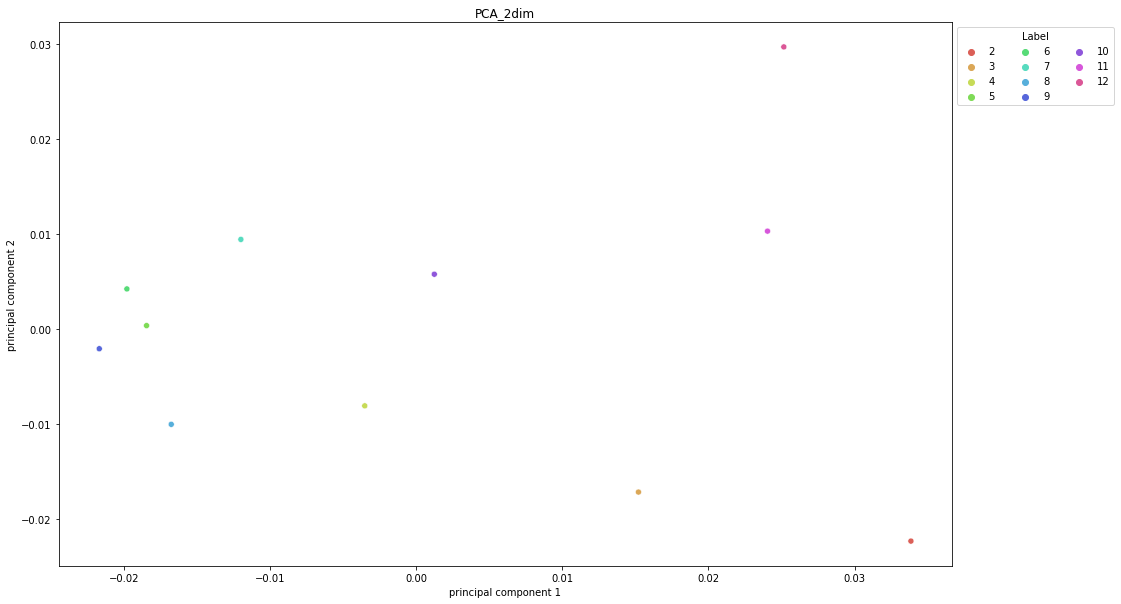

In [134]:
import seaborn as sns
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 11),
    data= PCA_mean_ph,
    legend="full",
)
ax.set(title='PCA_2dim')
sns.move_legend(
    ax, "upper left",
    bbox_to_anchor=(1, 1), ncol=3, title='Label',
)

### Between class & Within class

In [106]:
principal_ds_Df_pred_2.iloc[:,:]

,principal component 1,principal component 2,label
0,-0.021109,-0.001853,9
1,0.016833,-0.017730,3
2,-0.021842,-0.002110,9
3,-0.022502,0.004086,6
4,0.025952,-0.022237,2
...,...,...,...
812,0.011937,-0.008003,4
813,-0.027113,0.000433,5
814,-0.034671,-0.000951,9
815,0.030083,-0.018251,3


In [135]:
class_feature_means_PCA = pd.DataFrame()
for c, rows in principal_ds_Df_pred_2.groupby('label'):
    class_feature_means_PCA[c] = rows.mean()
class_feature_means_PCA

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,0.033855,0.015217,-0.003508,-0.018434,-0.019779,-0.011981,-0.016745,-0.021667,0.001252,0.024044,0.025160
principal component 2,-0.022293,-0.017132,-0.008055,0.000389,0.004252,0.009460,-0.010004,-0.002044,0.005799,0.010334,0.029725
label,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000


In [136]:
class_feature_means_PCA.iloc[:-1,:]

,2,3,4,5,6,7,8,9,10,11,12
principal component 1,0.033855,0.015217,-0.003508,-0.018434,-0.019779,-0.011981,-0.016745,-0.021667,0.001252,0.024044,0.025160
principal component 2,-0.022293,-0.017132,-0.008055,0.000389,0.004252,0.009460,-0.010004,-0.002044,0.005799,0.010334,0.029725


In [137]:
print(mean_XX_PCA, mean_YY_PCA)

0.0006741177871533652 3.9161815822017573e-05


In [138]:
aa = class_feature_means_PCA.iloc[:1,:] - mean_XX_PCA
bb = class_feature_means_PCA.iloc[1:2,:] - mean_YY_PCA

In [139]:
aa
bb

,2,3,4,5,6,7,8,9,10,11,12
principal component 2,-0.022332,-0.017171,-0.008094,0.00035,0.004212,0.009421,-0.010043,-0.002083,0.00576,0.010294,0.029686


In [140]:
A = np.array(aa*aa)
B = np.array(bb*bb)

In [141]:
num_sqrt = np.sqrt(A+B)
# print(num_sqrt)|

between_class_PCA = np.sum(num_sqrt) / 11

print("{:.4f}".format(between_class_PCA)) 

0.0218


In [142]:
all_class_PCA = [class2, class3, class4, class5, class6, class7, class8, class9, class10, class11, class12]

sum2 = 0
for m in range(0, 11):
  # print("\n ph ", m+2)
  sum = 0
  for i, (x, y, _) in enumerate(all_class_PCA[m]):

    sum += np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2)
    # print(np.sqrt((x - class_feature_means_PCA.iloc[0,m])**2 + (y - class_feature_means_PCA.iloc[1,m])**2))
    # print(x, y, np.array(class_feature_means_PCA.iloc[:2,m]))

  sum = sum/(i+1)

  sum2 += sum
  # print(i+1)
  # print(sum)

within_class_PCA = sum2/11
print("{:.4f}".format(within_class_PCA))

0.0092


In [143]:
print("{:.4f}".format(between_class_PCA / within_class_PCA))

2.3651


### PCA classifer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

In [ ]:
x_train_flat.shape, x_test_flat.shape

((3265, 3072), (817, 3072))

In [ ]:
pca_train = PCA(2)
pca_train.fit(x_train_flat)
train_img_pca = pca_train.transform(x_train_flat)

pca_test = PCA(2)
pca_test.fit(x_test_flat)
test_img_pca = pca_train.transform(x_test_flat)

In [ ]:
train_img_pca.shape, test_img_pca.shape

((3265, 2), (817, 2))

In [ ]:
y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)

In [ ]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_y)
test_Y_one_hot = to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[1])  # +2 to PH value 
print('After conversion to one-hot:', train_Y_one_hot[1])
print(train_y[:10])

Original label: [4]
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[ 4]
 [ 4]
 [ 9]
 [ 8]
 [ 8]
 [ 0]
 [ 7]
 [ 0]
 [ 4]
 [10]]


In [ ]:
num_classes = 11
def fc(enco):
    
    print(f'enco : {enco}')
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    print(out.shape)
    return out

In [ ]:
input_img = Input(shape = (2))
full_model = Model(input_img, fc(input_img))
full_model.summary()

enco : KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 11)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 11)                1419      
                                                                 
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
full_model.compile(loss = keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-1) ,metrics=['accuracy'])

In [ ]:
history_classify = full_model.fit(train_img_pca, train_Y_one_hot, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 1s 5ms/step - loss: 1.9076 - accuracy: 0.2933 - val_loss: 1.3496 - val_accuracy: 0.4257
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 1.1712 - accuracy: 0.5257 - val_loss: 0.9651 - val_accuracy: 0.5773
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.9239 - accuracy: 0.6348 - val_loss: 0.8944 - val_accuracy: 0.5972
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.6776 - val_loss: 0.7310 - val_accuracy: 0.7320
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.7125 - val_loss: 0.6520 - val_accuracy: 0.7274
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7638 - val_loss: 0.6255 - val_accuracy: 0.7458
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7898 - val_loss: 0.5580 - val_accuracy: 0.8086
Epoch 8/100
8

### Save model

In [ ]:
from google.colab import files
import joblib
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
full_model.save("/content/Jabu_PCA_2.h5")
files.download('/content/Jabu_PCA_2.h5')

joblib.dump(history_classify, '/content/Jabu_PCA_train_history_2')
files.download('/content/Jabu_PCA_train_history_2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###load PCA classfier model

In [ ]:
full_model = load_model('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_PCA_2.h5')
history_classify = joblib.load('/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_Jabu/Jabu_model/Jabu_PCA_train_history_2')

### Evaluate classify Model

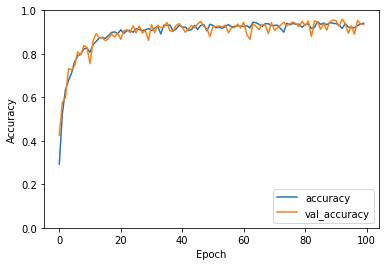

In [ ]:
plt.plot(history_classify.history['accuracy'], label='accuracy')
plt.plot(history_classify.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_eval = full_model.evaluate(test_img_pca, test_Y_one_hot, verbose=0)
print('Test loss:', round(test_eval[0], 4))
print('Test accuracy:', round(test_eval[1], 4))

Test loss: 0.1307
Test accuracy: 0.9388


In [ ]:
pre_img_test = full_model.predict(test_img_pca)
pre_img_train = full_model.predict(train_img_pca)

In [ ]:
pre_img_test[0].shape
print(pre_img_test[0])
print(np.max(pre_img_test[0]))
print(np.argmax(pre_img_test[0]))
print(np.sum(pre_img_test[0]))

[9.5652723e-01 4.3472581e-02 4.3184962e-18 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.0246134e-07 1.6761946e-34 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
0.95652723
0
1.0


In [ ]:
pre_img = np.argmax(np.round(pre_img_test),axis=1)
pre_img.shape

(817,)

In [ ]:
pre_img[0], test_y[0]

(0, array([0]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pre_img))
print(classification_report(test_y, pre_img))

[[57  8  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  2  0  0  0  0]
 [ 0  0 75  0  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  0 12  0  0]
 [ 0  0  0  0  0 84  0  0  0  0  0]
 [ 0  0  0  0  0  0 84  0  0  0  0]
 [ 0  0  0  3  0  0  0 79  0  0  0]
 [ 0  0  0  0 13  0  0  0 61  2  0]
 [ 0  0  0  0  0  0  0  0 10 54  0]
 [ 0  0  0  0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        65
           1       0.90      0.97      0.94        75
           2       1.00      1.00      1.00        75
           3       0.96      1.00      0.98        77
           4       0.83      0.84      0.83        74
           5       1.00      1.00      1.00        84
           6       0.98      1.00      0.99        84
           7       1.00      0.96      0.98        82
           8       0.73      0.80      0.77        76
           9       0.96      0.84      0.90        64
        

Text(33.0, 0.5, 'True Label')

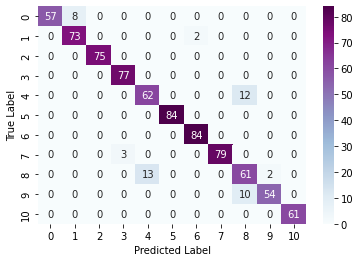

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, pre_img)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')